## Import libraries

In [109]:
import pandas as pd
import numpy as np

## Load dataset

In [110]:
train = pd.read_csv("./CNNtrain.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
test= pd.read_csv("./CNNtest.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Identifying X and Y train

In [112]:
X_train = train.drop(labels = ["label"],axis = 1) 
Y_train = train["label"]

## Normalization

In [113]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


## Reshape

In [114]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


## Label encoding

In [115]:
from keras.utils.np_utils import to_categorical 
Y_train = to_categorical(Y_train, num_classes = 10)

## Train-Test-Split the data

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, 
                                                  Y_train, 
                                                  test_size = 0.1, 
                                                  random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


## Import modeling libraries

In [117]:
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

## Creating the model

In [118]:
model = Sequential()
# input layer
model.add(Conv2D(filters = 8, kernel_size = (7,7),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# hidden layer 1
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# hidden layer 2
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 8)         400       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 14, 14, 8)         0         
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 7, 7, 16)         

## Compile the model

In [119]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer = optimizer , 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

## Data Augmentation

In [120]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [121]:
data_generator = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

data_generator.fit(X_train)

## Fit the Model

In [122]:
epochs = 15  # for better result increase the epochs
batch_size = 100

In [123]:
hist = model.fit(data_generator.flow(X_train,Y_train, batch_size=batch_size),
                    epochs = epochs, 
                    validation_data = (X_val,Y_val), 
                    steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/15
378/378 [==============================] - 14s 36ms/step - loss: 1.1354 - accuracy: 0.6068 - val_loss: 0.2448 - val_accuracy: 0.9388
Epoch 2/15
378/378 [==============================] - 13s 35ms/step - loss: 0.5053 - accuracy: 0.8392 - val_loss: 0.1646 - val_accuracy: 0.9531
Epoch 3/15
378/378 [==============================] - 14s 36ms/step - loss: 0.4024 - accuracy: 0.8752 - val_loss: 0.1348 - val_accuracy: 0.9610
Epoch 4/15
378/378 [==============================] - 14s 37ms/step - loss: 0.3364 - accuracy: 0.8953 - val_loss: 0.1113 - val_accuracy: 0.9662
Epoch 5/15
378/378 [==============================] - 13s 33ms/step - loss: 0.2983 - accuracy: 0.9062 - val_loss: 0.1135 - val_accuracy: 0.9667
Epoch 6/15
352/378 [==========================>...] - ETA: 0s - loss: 0.2722 - accuracy: 0.9159

## Plotting accuracy and loss

In [ ]:
import matplotlib.pyplot as plt

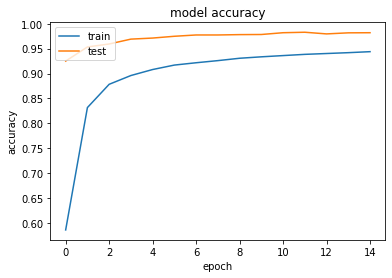

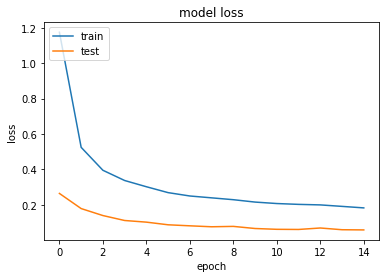

In [ ]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Confusion Matrix

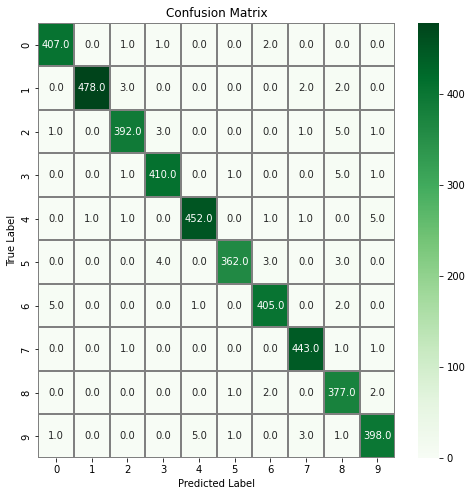

In [ ]:
import seaborn as sns
Y_pred = model.predict(X_val)

Y_pred_classes = np.argmax(Y_pred,axis = 1) 

Y_true = np.argmax(Y_val,axis = 1) 

conf_matrix = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))

sns.heatmap(conf_matrix, annot=True, linewidths=0.01,
            cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()